# Données antipathiques (skewed), Appariement - énoncé

Un problème où le map/reduce n'est pas la meilleure solution dans l'absolu. Comment faire quand on n'a que ça et un problème de détection de doublons dans un jeu de données ?

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Description du problème

On se place ici dans le cadre d'un problème classique désigné par le terme anglais de [conflation](http://www.citygategis.com/whatisconflation.htm) (voir aussi [Conflation Optimized by Least Squares to Maintain Geographic Shapes](http://www.mdpi.com/2220-9964/2/3/621). Il s'agit de fusionner deux bases de données qui décrivent chacune les mêmes entités (deux annuaires par exemple) mais de manière légèrement différentes.

Par exemple, on dispose de deux bases $B_1$ et $B_2$. Chacune d'elles donne les positions géographiques de $N_1$ et $N_2$ bâtiments. La mesure des coordonnées est faite à dix ans d'intervalles et on souhaite connaître les bâtiments qui ont été détruits ou créés. Il faut donc apparier les $N_1$ entités de la première base avec les $N_2$ de la seconde.

Une première option consiste à calculer toutes les distances entre les deux bases soit $N_1 N_2$ distances puis à apparier les deux points les plus proches, puis les deux suivantes les plus proches jusqu'à ce qu'on décide qu'à partir d'un certain seuil, deux bâtiments sont probablement trop éloignés pour être appariés.

Lorsqu'on dispose de grandes bases, 10 millions d'entités par exemple, ce calcul devient impossible à réaliser en un temps raisonnable. Il faut ruser.

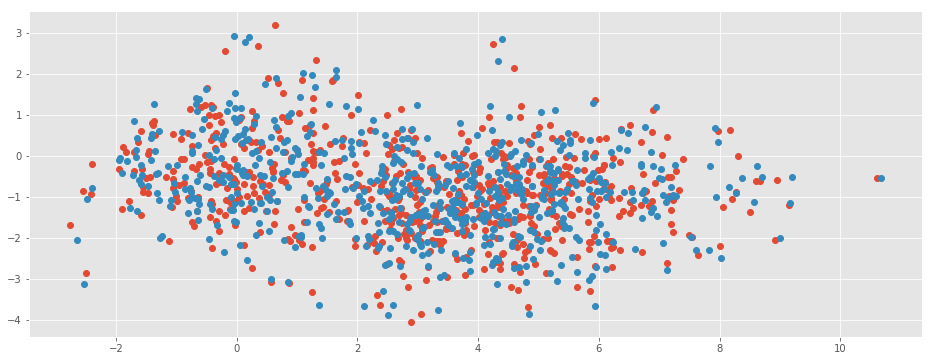

In [3]:
import random
x1 = [random.gauss(0,1) for i in range(0,150)] + [random.gauss(0,1)*2 + 4 for i in range(0,500)]
y1 = [random.gauss(0,1) for i in range(0,150)] + [random.gauss(0,1)-1 for i in range(0,500)]
x2 = [x + random.gauss(0,0.2) for x in x1 ]
y2 = [y + random.gauss(0,0.2) for y in y1 ]
plt.figure(figsize=(16,6))
plt.plot(x1,y1,"o")
plt.plot(x2,y2,"o");

On veut apparier les points bleus et rouges. Si on dessine une grille sur les données, deux points ont plus de chance d'être appariés s'ils font partie de la même case. Mais cela ne suffit pas. Il faut aussi considérer les voisins.

## Exercice 1 : combien de voisins faut-il considérer ?

On veut être sûr de ne manquer aucun appariement. On suppose que les cases sont de tailles $(W,H)$. On suppose que deux points $P_i$ (rouge) et $Q_j$ (bleu) ne peuvent jamais être appariés si la distance $dist( P_i,Q_j) > h$. Le point $P_i=(x_1^i,y_1^i)$ est dans la case $c_1^i=(k_1^i,l_1^i)$. Où peut être $Q_j$ ? Comment utiliser cette information pour réduire le nombre de distances à calculer ?

## Exercice 2 : nombre de distances ?

Ecrire un programme python qui calcule ce nombre de distances.

## Exercice 3 : distribuer les calculs
    
Ecrire le même programme en PIG.

## Exercice 4 : données antipathiques
    
Y a-t-il des cas où cette distribution sera difficilement réalisable ? (indice : **skewed**)


## Exercice 5 : comment distribuer malgré tout ?

Oublions le problème initial. On a deux datasets qu'on doit fusionner (*JOIN*). Une des clés est partagée par plus de 10% des deux bases. Comment distribuer ce *JOIN* sur plusieurs machines ?